In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

In [14]:
# CIFAR-10
model_100 = pd.read_csv("../eval/edit_success_20210506.16.05.1620344590_finetune_epoch199_ts9999.20210429.19.04.1619750982")
gpt_100 = pd.read_csv("../eval/edit_success_20210506.16.05.1620344071_finetune_epoch9_ts9999.20210506.01.05.1620288910")

In [ ]:
# ImageNet
model_100 = pd.read_csv("../eval/edit_success_20210506.13.05.1620331667_resnet18_pretrained")
# gpt_100 = pd.read_csv("")

# Edit success

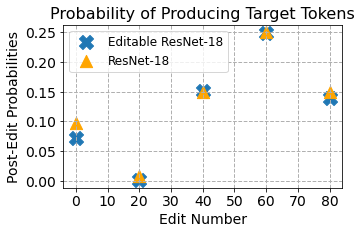

In [15]:
model_100['grouping'] = (
    model_100
    .edit_number
    .apply(lambda x: int(x /20) * 20)
)
ax=(
    model_100
    .query('edit_step == 1')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(np.exp(x)))
    .reset_index()
    .plot(
        kind='scatter', x="grouping",y="log_prob", 
        marker="X", s=200, figsize=(10,7),
        label="Editable ResNet-18"
    )
)


gpt_100['grouping'] = (
    gpt_100
    .edit_number
    .apply(lambda x: int(x /20) * 20)
)
(
    gpt_100
    .query('edit_step == 1')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(np.exp(x)))
    .reset_index()
    .plot(
        kind='scatter', x="grouping",y="log_prob", 
        color='orange', marker="^", s=150, figsize=(5,3),
        label="ResNet-18", ax=ax
    )
)

plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Post-Edit Probabilities", fontsize=14)
plt.yticks(fontsize=14)
# plt.ylim(-0.01,0.16)
plt.title("Probability of Producing Target Tokens", fontsize=16)
plt.legend(fontsize=12)
plt.grid(linestyle='--', linewidth=1)
plt.savefig('edit_success.png', bbox_inches='tight', facecolor="#ffffff")

# Accuracy

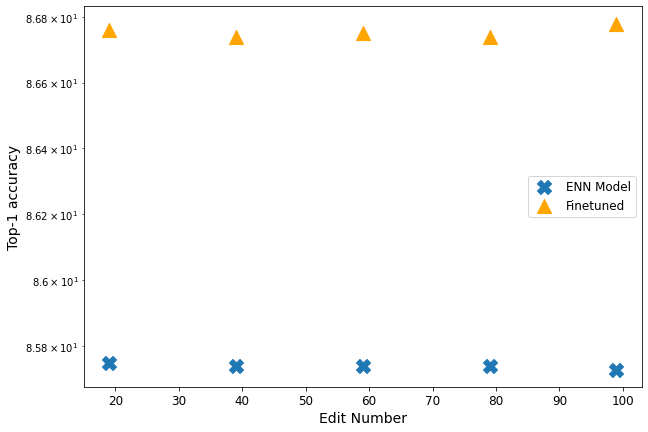

In [16]:
ax = (
   model_100.loc[~model_100.new_acc1.isna()]
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='scatter', x="edit_number",y="new_acc1", 
        marker="X", s=200, figsize=(10,7),
        label="ENN Model"
    )
)

(
    gpt_100.loc[~gpt_100.new_acc1.isna()]
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='scatter', x="edit_number",y="new_acc1",
        color='orange', marker="^", s=200, 
        label='Finetuned', ax=ax
    )
)
plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Top-1 accuracy", fontsize=14)
plt.yticks(fontsize=12)
plt.yscale("log")
plt.title("", fontsize=16)
plt.legend(fontsize=12)
plt.savefig('perplexity.png', bbox_inches='tight', facecolor="#ffffff")

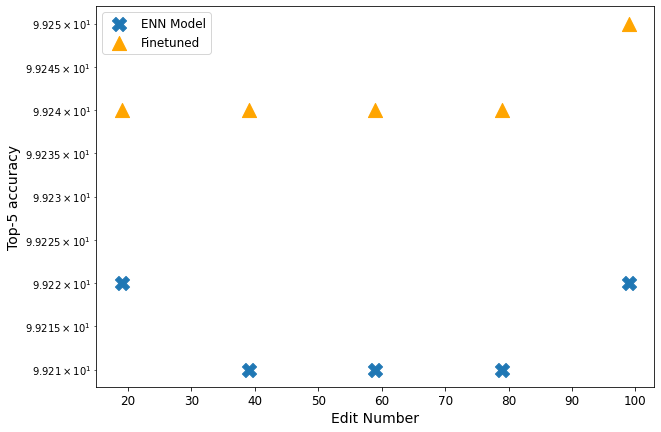

In [17]:
ax = (
   model_100.loc[~model_100.new_acc5.isna()]
    .groupby("edit_number")
    .new_acc5.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc5"]]
    .plot(
        kind='scatter', x="edit_number",y="new_acc5", 
        marker="X", s=200, figsize=(10,7),
        label="ENN Model"
    )
)

(
    gpt_100.loc[~gpt_100.new_acc5.isna()]
    .groupby("edit_number")
    .new_acc5.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc5"]]
    .plot(
        kind='scatter', x="edit_number",y="new_acc5",
        color='orange', marker="^", s=200, 
        label='Finetuned', ax=ax
    )
)
plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Top-5 accuracy", fontsize=14)
plt.yticks(fontsize=12)
plt.yscale("log")
plt.title("", fontsize=16)
plt.legend(fontsize=12)
plt.savefig('perplexity.png', bbox_inches='tight', facecolor="#ffffff")

In [12]:
model_100.loc[~gpt_100.new_acc5.isna()]

,model_number,edit_number,train_step,n_edit_steps,edit_step,log_prob,orig_acc1,new_acc1,orig_acc5,new_acc5,norm,grouping
209,0,19,19,10,0,-21.838100,85.75,85.72,99.22,99.22,0.029695,0
210,0,19,19,10,1,-21.833950,85.75,85.72,99.22,99.22,0.029695,0
211,0,19,19,10,2,-21.829800,85.75,85.72,99.22,99.22,0.029695,0
212,0,19,19,10,3,-21.825638,85.75,85.72,99.22,99.22,0.029695,0
213,0,19,19,10,4,-21.821495,85.75,85.72,99.22,99.22,0.029695,0
214,0,19,19,10,5,-21.817341,85.75,85.72,99.22,99.22,0.029695,0
215,0,19,19,10,6,-21.813196,85.75,85.72,99.22,99.22,0.029695,0
216,0,19,19,10,7,-21.809042,85.75,85.72,99.22,99.22,0.029695,0
217,0,19,19,10,8,-21.804893,85.75,85.72,99.22,99.22,0.029695,0
218,0,19,19,10,9,-21.800739,85.75,85.72,99.22,99.22,0.029695,0


In [28]:
ax = (
   model_100.loc[~model_100.val_loss.isna()]
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='scatter', x="edit_number",y="new_acc1", 
        marker="X", s=200, figsize=(10,7),
        label="ENN Model"
    )
)

(
    gpt_100.loc[~gpt_100.new_acc1.isna()]
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='scatter', x="edit_number",y="new_acc1",
        color='orange', marker="^", s=200, 
        label='Finetuned', ax=ax
    )
)
plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Top-1 accuracy", fontsize=14)
plt.yticks(fontsize=12)
plt.yscale("log")
plt.title("", fontsize=16)
plt.legend(fontsize=12)
plt.savefig('perplexity.png', bbox_inches='tight', facecolor="#ffffff")

AttributeError: 'DataFrame' object has no attribute 'val_loss'

# L2 distance

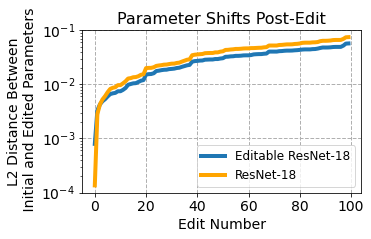

In [18]:
(
    model_100
    .query('edit_step == 1')
    .groupby("edit_number")
    .norm.mean()
    .plot(label="Editable ResNet-18", figsize=(5,3), linewidth=4)
)


(
    gpt_100
    .query('edit_step == 1')
    .groupby("edit_number")
    .norm.mean()
    .plot(color='orange', label="ResNet-18", linewidth=4)
)

plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("L2 Distance Between\n Initial and Edited Parameters", fontsize=14)
plt.yticks(fontsize=14)
plt.yscale("log")
plt.legend(fontsize=12)
plt.grid(linestyle='--', linewidth=1)
plt.title("Parameter Shifts Post-Edit", fontsize=16)
plt.savefig('l2_distance.png', bbox_inches='tight', facecolor="#ffffff")